In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn

print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Matplotlib version: {matplotlib.__version__}')
print(f'Sklearn version: {sklearn.__version__}')

Pandas version: 1.0.5
Numpy version: 1.18.5
Matplotlib version: 3.2.2
Sklearn version: 0.23.1


In [2]:
from typing import List, Dict, Any, Tuple, Callable
from sklearn.feature_extraction.text import CountVectorizer

# Setul de date - SMS Spam Collection

## Descrierea setului de date

Această colecție de date reprezintă un <b>set public de SMS-uri etichetate ca fiind spam sau non-spam (legitime)</b>, colectate pentru cercetarea în domeniul mesajelor de telefonie mobilă.


Setul de date conține, în total, <b>5574 mesaje etichetate</b>.


Fiecare mesaj este reprezentat pe o singură linie în fișier, iar fiecare linie este împărțită în două coloane. Prima dintre ele conține eticheta (ham respectiv spam) iar a doua coloană conține mesajul propriu-zis.

<b>Conținutul</b> fișierului a fost colectat din resurse gratuite de cercetare de pe Internet. Astfel, putem enumera următoarele surse:
- 425 de SMS-uri au fost extrase manual de pe site-ul [Grumbletext Web](http://www.grumbletext.co.uk/). Acesta este un forum din UK în care utilizatorii de telefoane mobile își pot face publice mesajele spam.
- 3375 de SMS-uri legitime au fost alese random din NSC (NUS SMS Corpus). Acesta este un set de date care conține aproximativ 10000 de mesaje legitime colectate de către Departamentul de Informatică de la Universitatea Națională din Singapore.
- 450 de SMS-uri legitime au fost colectate din [teza de doctorat a lui Caroline Tagg](https://etheses.bham.ac.uk/id/eprint/253/1/Tagg09PhD.pdf)
- restul SMS-urilor au fost preluate din "SMS Spam Corpus v.0.1 Big" care conține 1002 SMS-uri legitime și 322 spam.

Acest set de date își propune să ofere suport în <b>clasificarea</b> mesajelor, astfel încât să se poată diferenția cât mai ușor mesajele <i>spam</i> de cele <i>non-spam</i>.

## Importarea datelor

In [3]:
names_housting: List[str] = ['label', 'message']    

sms_data: pd.DataFrame = pd.read_csv('./data/SMSSpamCollection', names = names_housting, delimiter = '\t')
sms_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms_data['label'] = sms_data['label'].map({'spam': 1, 'ham': 0})
sms_data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Analiza exploratorie

### Numarul de cuvinte

In [5]:
vect = CountVectorizer()
vect_fit = vect.fit_transform(sms_data.iloc[:, 1])
print(f'Dimensiune vocabular: {len(vect.vocabulary_)}')

Dimensiune vocabular: 8713


### Distributia claselor

In [6]:
ham_count: int = len(sms_data[sms_data.label == 0].index)
spam_count: int = len(sms_data[sms_data.label == 1].index)

print(f"Numarul de mesaje cu label-ul 'ham': {ham_count}")
print(f"Numarul de mesaje cu label-ul 'spam: {spam_count}")

Numarul de mesaje cu label-ul 'ham': 4825
Numarul de mesaje cu label-ul 'spam: 747


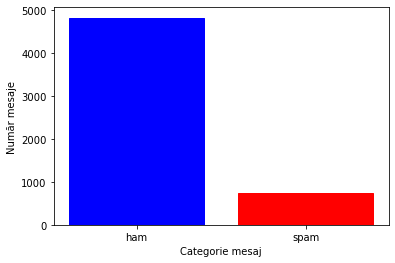

In [7]:
hist_x = ['ham', 'spam']; 
hist_y = [ham_count, spam_count]
stats = plt.bar(hist_x, hist_y, align='center')
stats[0].set_color('b')
stats[1].set_color('r')
plt.xlabel('Categorie mesaj')
plt.ylabel('Număr mesaje')
plt.show()

### Cele mai frecvente cuvinte

In [8]:
k = 20
word_list, count_list = vect.get_feature_names(), vect_fit.toarray().sum(axis=0)
word_freq = pd.DataFrame(list(zip(word_list, count_list)), columns =['Cuvant', 'Frecvență'])

print(f'Cele mai frecvente {k} de cuvinte:')
word_freq_desc = word_freq.sort_values(by='Frecvență', ascending=False)[:k]
display(word_freq_desc)

Cele mai frecvente 20 de cuvinte:


,Cuvant,Frecvență
7806,to,2253
8668,you,2245
7674,the,1339
1097,and,980
4114,in,903
4233,is,897
4968,me,807
5254,my,766
4245,it,752
3323,for,711


### Lungime minima/medie/maxima 

In [9]:
messages_lenght: pd.DataFrame = sms_data.copy()
messages_lenght['lenght'] = messages_lenght['message'].apply(len)
messages_lenght.head()

,label,message,lenght
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
print(f'Lungimea minima a unui mesaj: {int(messages_lenght.lenght.describe()["min"])} caractere')
print(f'Lungimea maxima a unui mesaj: {int(messages_lenght.lenght.describe()["max"])} caractere')
print(f'Lungimea medie a unui mesaj: {int(messages_lenght.lenght.describe()["mean"])} caractere')

Lungimea minima a unui mesaj: 2 caractere
Lungimea maxima a unui mesaj: 910 caractere
Lungimea medie a unui mesaj: 80 caractere


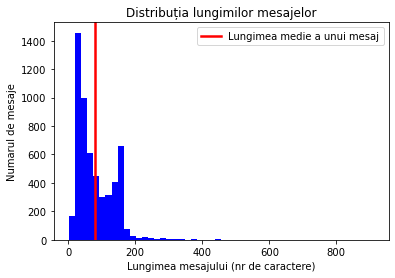

In [11]:
plt.hist(x = messages_lenght.lenght, color='b', bins = 50)

plt.axvline(int(messages_lenght.lenght.describe()["mean"]), 
            color='r', linewidth=2.5, label="Lungimea medie a unui mesaj")

plt.title('Distribuția lungimilor mesajelor')
plt.xlabel('Lungimea mesajului (nr de caractere)')
plt.ylabel('Numarul de mesaje')
plt.legend(loc=0)
plt.show()

# Setul de date - Sentiment Labelled Sentences

## Descrierea setului de date
Acest set de date conține <b>propoziții etichetate în funcție de sentimentele pe care le exprimă (1 - pozitiv, 0 - negativ)</b>.

Setul de date conține, în total, <b>3000</b> de astfel de propoziții.

Fiecare propoziție este reprezentată pe o singură linie în fișier, iar fiecare linie este împărțită în două coloane. Prima dintre ele conține propoziția propiu-zisă iar a doua coloană conține eticheta (0 sau 1).

<b>Conținutul</b> este luat din trei surse diferite:
- [imdb.com](https://www.imdb.com/)
- [amazon.com](https://www.amazon.com/)
- [yelp.com](https://www.yelp.ie/dublin)

Pentru fiecare dintre aceste surse există câte un fișier text separat care conține 500 de propoziții pozitive și 500 negative. Aceste au fost selectate în mod aleator din seturi de date mai mari.

<b>Imbd:</b>
Conține review-uri referitoare la filme.


<b>Amazon:</b>
Conține review-uri și scoruri pentru produsele vândute pe [amazon.com](https://www.amazon.com/) din categoria de telefoane și accesorii. Scorurile au valori între 1 și 5. Astfel, acele valori de 4 și 5 sunt considerate ca fiind pozitive, iar restul negative.

<b>Yelp:</b>
Conține review-uri referitoare la restaurante. Scorurile sunt considerate exact la fel ca și pentru Amazon.

Acest set de date își propune să ofere suport în <b>clasificarea</b> propozițiilor, astfel încât să se poată diferenția cât mai ușor <i>sentimentele pozitive</i> de cele <i>negative</i>.

## Importarea datelor

In [12]:
names_housting: List[str] = ['message', 'label']   

amazon_data: pd.DataFrame = pd.read_csv('./data/amazon_cells_labelled.txt', names = names_housting, delimiter = '\t')
    
yelp_data: pd.DataFrame = pd.read_csv('./data/yelp_labelled.txt', names = names_housting, delimiter = '\t')
    
imbd_data: pd.DataFrame = pd.read_csv('./data/imdb_labelled.txt', names = names_housting, delimiter = '\t')

sentiment_data: pd.DataFrame = amazon_data
sentiment_data = sentiment_data.append(yelp_data)
sentiment_data = sentiment_data.append(imbd_data)

sentiment_data.reset_index(inplace = True, drop = True)

sentiment_data.head()

,message,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## Analiza exploratorie

### Numarul de cuvinte

In [13]:
vect = CountVectorizer()
vect_fit = vect.fit_transform(sentiment_data.iloc[:, 0])
print(f'Dimensiune vocabular: {len(vect.vocabulary_)}')

Dimensiune vocabular: 5155


### Distributia Claselor

In [15]:
number_of_negative_messages: int = sentiment_data.label.value_counts()[0]
number_of_positive_messages: int = sentiment_data.label.value_counts()[1]

print(f'Numarul de mesaje pozitive: {number_of_positive_messages}')
print(f'Numarul de mesaje negative: {number_of_negative_messages}')

Numarul de mesaje pozitive: 1386
Numarul de mesaje negative: 1362


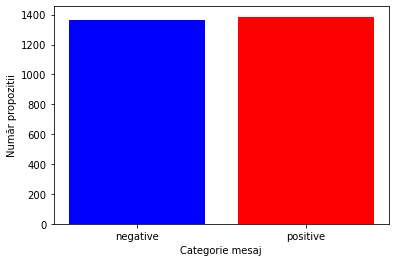

In [16]:
hist_x = ['negative', 'positive']; 
hist_y = [number_of_negative_messages, number_of_positive_messages]
stats = plt.bar(hist_x, hist_y, align='center')
stats[0].set_color('b')
stats[1].set_color('r')
plt.xlabel('Categorie mesaj')
plt.ylabel('Număr propozitii')
plt.show()

### Cele mai frecvente 20 de cuvinte

In [17]:
k = 20
word_list, count_list = vect.get_feature_names(), vect_fit.toarray().sum(axis=0)
word_freq = pd.DataFrame(list(zip(word_list, count_list)), columns =['Cuvant', 'Frecvență'])

print(f'Cele mai frecvente {k} de cuvinte:')
word_freq_desc = word_freq.sort_values(by='Frecvență', ascending=False)[:k]
display(word_freq_desc)

Cele mai frecvente 20 de cuvinte:


,Cuvant,Frecvență
4531,the,1953
216,and,1138
2432,it,789
2427,is,754
4609,to,670
4558,this,643
3097,of,624
4968,was,571
2314,in,400
1829,for,336


### Lungime minima/medie/maxima 

In [18]:
messages_lenght: pd.DataFrame = sentiment_data
messages_lenght['lenght'] = sentiment_data['message'].apply(len)
messages_lenght.head()

,message,label,lenght
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17


In [26]:
print(f'Lungimea minima a unei propozitii: {int(messages_lenght.lenght.describe()["min"])} caractere')
print(f'Lungimea maxima a unei propozitii: {int(messages_lenght.lenght.describe()["max"])} caractere')
print(f'Lungimea medie a unei propozitii: {int(messages_lenght.lenght.describe()["mean"])} caractere')

Lungimea minima a unei propozitii: 7 caractere
Lungimea maxima a unei propozitii: 7944 caractere
Lungimea medie a unei propozitii: 71 caractere


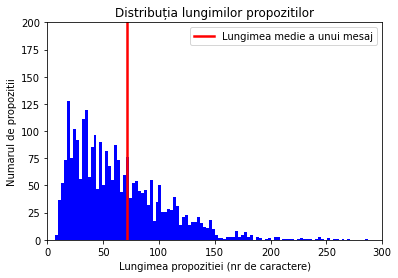

In [25]:
plt.hist(x = messages_lenght.lenght, color='b', bins = 3000)

plt.axvline(int(messages_lenght.lenght.describe()["mean"]), 
            color='r', linewidth=2.5, label="Lungimea medie a unei propozitii")

plt.title('Distribuția lungimilor propozitilor')
plt.xlabel('Lungimea propozitiei (nr de caractere)')
plt.ylabel('Numarul de propozitii')
plt.legend(loc=0)
plt.axis((0,300, 0, 200))
plt.show()

## Preprocesarea datelor

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import scipy

### Conversia textului în numere

#### Bag of Words
Mașinile, spre deosebire de oameni, nu pot înțelege textul brut. Mașinile pot vedea numai numere. În special, tehnicile statistice, cum ar fi învățarea automată, se pot ocupa doar de cifre. Prin urmare, trebuie să ne convertim textul în cifre.

Există diferite abordări pentru a converti textul în forma numerică corespunzătoare. Modelul Bag of Words și Modelul de încorporare a cuvintelor sunt două dintre cele mai utilizate abordări. În acest articol, vom folosi modelul sacului de cuvinte pentru a ne converti textul în cifre.

#### TFIDF

Abordarea Bag of Words funcționează bine pentru conversia textului în numere. Cu toate acestea, are un dezavantaj. Atribuie un scor unui cuvânt pe baza apariției sale într-un anumit document. Nu ia în considerare faptul că cuvântul ar putea avea, de asemenea, o frecvență mare de apariție și în alte documente. TFIDF rezolvă această problemă înmulțind frecvența termenului unui cuvânt cu frecvența inversă a documentului. TF înseamnă „Term Frequency”, în timp ce IDF înseamnă „Inverse Document Frequency”.

Term frequency - inverse document frequency da pondere unui cuvant care apare frecvent intr-un document, dar nu in multe documente - deci are putere descriptiva pentru documentul in care apare frecvent. Pentru un document $d$ si un cuvant $w$, valoarea tfidf se calculeaza ca:
$$
tfidf(w, d) = tf(w, d) \cdot \log\left( \frac{N+1}{N_w+1} \right) + 1
$$
unde: $tf(w, d)$ este numarul de aparitii ale lui $w$ in document $d$, $N$ e numarul total de documente din corpus, $N_w$ este numarul de documente din corpus care contin cuvantul $w$. Pentru fiecare document $d$ se calculeaza un astfel de vector, care in final este normalizat in norma $L_2$ la 1.

##  SMS Spam Collection

In [22]:
vect: CountVectorizer = CountVectorizer()
X: CountVectorizer = vect.fit(sms_data.message)

print(f'Dimensiunea vocabularului: {len(vect.vocabulary_)}')

Dimensiunea vocabularului: 8713


### Obținerea vectorului Bag Of Words

In [23]:
bow: scipy.sparse.csr.csr_matrix = vect.transform(sms_data.message)
print(f'Reprezentarea ca vectori:\n {bow.toarray()}')
print(f'Numărul de vectori: {len(bow.toarray())}')

Reprezentarea ca vectori:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Numărul de vectori: 5572


In [24]:
print(f'Reprezentarea ca vectori rari:\n{bow}')

Reprezentarea ca vectori rari:
  (0, 1082)	1
  (0, 1316)	1
  (0, 1765)	1
  (0, 1767)	1
  (0, 2061)	1
  (0, 2338)	1
  (0, 3571)	1
  (0, 3615)	1
  (0, 3655)	1
  (0, 4114)	1
  (0, 4374)	1
  (0, 4501)	1
  (0, 5571)	1
  (0, 5958)	1
  (0, 7694)	1
  (0, 8084)	1
  (0, 8324)	1
  (0, 8548)	1
  (1, 4342)	1
  (1, 4537)	1
  (1, 5538)	1
  (1, 5567)	1
  (1, 8450)	1
  (2, 77)	1
  (2, 403)	1
  :	:
  (5570, 1794)	1
  (5570, 1802)	1
  (5570, 2606)	1
  (5570, 2905)	1
  (5570, 3323)	1
  (5570, 3373)	1
  (5570, 3489)	1
  (5570, 3709)	1
  (5570, 3805)	1
  (5570, 4114)	1
  (5570, 4188)	1
  (5570, 4245)	1
  (5570, 4642)	1
  (5570, 5367)	1
  (5570, 7089)	1
  (5570, 7099)	1
  (5570, 7674)	1
  (5570, 7806)	1
  (5570, 8120)	1
  (5570, 8371)	1
  (5571, 4253)	2
  (5571, 5276)	1
  (5571, 6548)	1
  (5571, 7806)	1
  (5571, 7938)	1


In [25]:
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(bow).toarray()

## Sentiment Labelled Sentences

In [26]:
vect: CountVectorizer = CountVectorizer(stop_words = 'english')
X: CountVectorizer = vect.fit(sentiment_data.message)

print(f'Dimensiunea vocabularului: {len(vect.vocabulary_)}')

Dimensiunea vocabularului: 4896


### Obținerea vectorului Bag Of Words

In [27]:
bow: scipy.sparse.csr.csr_matrix = vect.transform(sentiment_data.message)
print(f'Reprezentarea ca vectori:\n {bow.toarray()}')
print(f'Numărul de vectori: {len(bow.toarray())}')
print(f'Numărul de elemente dintr-un vector: {len(bow.toarray()[0])}')

Reprezentarea ca vectori:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Numărul de vectori: 2748
Numărul de elemente dintr-un vector: 4896


In [28]:
print(f'Reprezentarea ca vectori rari:\n{bow}')

Reprezentarea ca vectori rari:
  (0, 959)	1
  (0, 3217)	1
  (0, 4566)	1
  (0, 4754)	1
  (1, 661)	1
  (1, 1526)	1
  (1, 1896)	1
  (1, 4631)	1
  (2, 1926)	1
  (2, 2330)	1
  (3, 45)	1
  (3, 716)	1
  (3, 958)	1
  (3, 2446)	1
  (3, 2628)	1
  (3, 2760)	1
  (3, 3312)	1
  (3, 4369)	1
  (4, 1926)	1
  (4, 2740)	1
  (5, 1113)	1
  (5, 2345)	1
  (5, 2524)	1
  (5, 3217)	1
  (5, 3604)	1
  :	:
  (2742, 4717)	1
  (2743, 503)	1
  (2743, 810)	1
  (2743, 1905)	1
  (2743, 2342)	1
  (2743, 2374)	1
  (2743, 2436)	1
  (2743, 4747)	1
  (2744, 1661)	1
  (2744, 2576)	1
  (2744, 3323)	1
  (2744, 3501)	1
  (2744, 3753)	1
  (2744, 4550)	1
  (2744, 4679)	1
  (2744, 4837)	1
  (2745, 1437)	1
  (2745, 4835)	1
  (2746, 343)	1
  (2746, 1530)	1
  (2747, 2137)	1
  (2747, 2266)	1
  (2747, 2273)	1
  (2747, 2788)	1
  (2747, 4740)	1


In [29]:
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(bow).toarray()

# Modele de clasificare

In [30]:
def get_mean_scores(scores: Dict[str, List[float]]) -> Dict[str, List[float]]:
    """
    Transformes the values (list of numbers) of the given dictionary into their average. 
    
    :param scores: a dictionary that has list values
    
    :returns: the transformed dictionary
    """
    for key in scores.keys():
        scores[key] = scores[key].mean()
    return scores

In [31]:
def apply_models_on_data(X, y, models: List[Any]) -> pd.DataFrame:
    """
    Applies the given models on the given dataset and creates a data frame with the results  
    
    :param X: dataset feautures
    :param y: dataset labels
    :param models: list of models to be called
    
    :return: data frame with each model's results using GridSearchCV and RandomizedSearchedCV
    """
    table: pd.DataFrame = pd.DataFrame()
    
    for model in models:
        result = model(X, y) 
        
        gridCV: Dict[str, Any] = {'Search_srategy' : 'GridSearchCV', 'Model_name' : models_names[model.__name__]}
        gridCV.update(result)
        
        table = table.append(gridCV, ignore_index=True)
        
    return table

In [32]:
def model_result(pipe, X: np.ndarray, y: np.ndarray, 
                 parameter_grid: Dict[str, Any]) -> Dict[str, List[float]]:
        
    """
    Applies cross_validate (5 fold cross validation) and report accuracy and f1 score.
    The optimal hyperparameters are being found using both GridSearchCV with cv = 3 and  and optimizing F1 score.

    :param pipe: the pipeline used in GridSearchCV
    :param X: dataset feautures
    :param y: dataset labels
    :param parameter_grid: a dictionary with the possible values for the hyperparameters
    
    :returns: the mean results of the model
    """    
    scores: List[str] = ['accuracy', 'f1_macro']
    grid_search: Dict[str, List[float]] = cross_validate(GridSearchCV(pipe, 
                                                                  param_grid = parameter_grid,
                                                                  cv = 3), 
                                                  X, y, cv = 5, 
                                                  scoring = scores, 
                                                  return_train_score = True)
                                                
    grid_search: Dict[str, List[float]] = get_mean_scores(grid_search)              
    return grid_search

In [33]:
def SGD_classifier(X: np.ndarray, y: np.ndarray) -> Dict[str, List[float]]:
    """
    Applies SGDClassifier with optimal parameters on a dataset and 
    preprocess data set with CountVectorizer and TfidfTransformer
    
    :param X: dataset feautures
    :param y: dataset labels
    
    :returns: the mean results of the model
    """
    
    pipe = Pipeline([ ('vect', CountVectorizer(stop_words = 'english')),
                      ('tfidf', TfidfTransformer()),
                      ('sgd', SGDClassifier())])
    
    parameter_grid: Dict[str, List[Any]] = {'sgd__loss': ['hinge', 'log', 'perceptron'], 
                  'sgd__penalty': ['l2', 'l1', 'elasticnet'],
                 'sgd__alpha': [0.0001, 0.0002]}
       
    
    return model_result(pipe, X, y, parameter_grid)

In [34]:
def KNeighbors_classifier(X: np.ndarray, y: np.ndarray) -> Dict[str, List[float]]:
    """
    Applies KNeighborsClassifier with optimal parameters on a dataset and 
    preprocess data set with CountVectorizer and TfidfTransformer
    
    :param X: dataset without labels
    :param y: labels
    
    :return:  the mean results of the model
    """    
    pipe = Pipeline([ ('vect', CountVectorizer(stop_words = 'english')),
                      ('tfidf', TfidfTransformer()),
                      ('knn', KNeighborsClassifier())])
    
    parameter_grid: Dict[str, List[Any]] = {'knn__n_neighbors': list(range(5, 10)), 
                      'knn__p': list(range(1, 3))}
       
    return model_result(pipe, X, y, parameter_grid)

In [35]:
def DecisionTree_classifier(X: np.ndarray, y: np.ndarray) -> Dict[str, List[float]]:
    """
    Applies DecisionTreeClassifier model with optimal parameters on a dataset and 
    preprocess data set with CountVectorizer and TfidfTransformer
    
    :param X: data set without the labels
    :param Y: labels
    
    :returns:  the mean results of the model
    """
    pipe = Pipeline([ ('vect', CountVectorizer(stop_words = 'english')),
                      ('tfidf', TfidfTransformer()),
                      ('dt', DecisionTreeClassifier())])
    
    parameter_grid: Dict[str, List[Any]] = {'dt__criterion': ['entropy', 'gini'], 
                  'dt__max_depth': list(range(3,9)),
                  'dt__min_samples_leaf': list(range(10,20))}
        
    return model_result(pipe, X, y, parameter_grid)

In [36]:
def RandomForest_classifier(X: np.ndarray, y: np.ndarray) -> Dict[str, List[float]]:
    """
    Apply RandomForestClassifier model with optimal parameters on a dataset and 
    preprocess data set with CountVectorizer and TfidfTransformer
    
    :param X: data set without the labels
    :param Y: labels
    
    :returns: the mean results of the model
    """    
    pipe = Pipeline([ ('vect', CountVectorizer(stop_words = 'english')),
                      ('tfidf', TfidfTransformer()),
                      ('rf', RandomForestClassifier())])
    
    parameter_grid: Dict[str, List[Any]] = {'rf__n_estimators': list(range(1,10)), 
                'rf__criterion': ['entropy', 'gini'],
                'rf__max_depth': list(range(3,9))}
        
    return model_result(pipe, X, y, parameter_grid)

In [37]:
models: List[Callable] = [KNeighbors_classifier, SGD_classifier, DecisionTree_classifier, RandomForest_classifier] 
models_names: Dict[str, str] = { 'SGD_classifier': 'SGDClassifier',
                               'KNeighbors_classifier': 'KNeighborsClassifier',
                               'DecisionTree_classifier': 'DecisionTreeClassifier',
                               'RandomForest_classifier': 'RandomForestClassifier'}

# Aplicarea modelelor

## SMS spam Collection

In [38]:
sms_data_table: pd.DataFrame = apply_models_on_data(sms_data.iloc[:, 1], sms_data.iloc[:, 0], models)
display(sms_data_table)

,Model_name,Search_srategy,fit_time,score_time,test_accuracy,test_f1_macro,train_accuracy,train_f1_macro
0,KNeighborsClassifier,GridSearchCV,18.541896,0.342636,0.907573,0.711545,0.917803,0.756191
1,SGDClassifier,GridSearchCV,12.154069,0.053181,0.983847,0.963774,0.998654,0.997092
2,DecisionTreeClassifier,GridSearchCV,72.684576,0.041159,0.944900,0.863231,0.949165,0.875314
3,RandomForestClassifier,GridSearchCV,64.142959,0.041267,0.905777,0.708313,0.911432,0.731682


## Sentiment Labelled Sentances

In [39]:
sentimen_data_table: pd.DataFrame = apply_models_on_data(sentiment_data.iloc[:, 0], sentiment_data.iloc[:, 1], models)
display(sentimen_data_table)

,Model_name,Search_srategy,fit_time,score_time,test_accuracy,test_f1_macro,train_accuracy,train_f1_macro
0,KNeighborsClassifier,GridSearchCV,6.544839,0.112493,0.695745,0.681553,0.834794,0.831171
1,SGDClassifier,GridSearchCV,4.984980,0.022327,0.787830,0.787370,0.970888,0.970886
2,DecisionTreeClassifier,GridSearchCV,32.280194,0.020525,0.641892,0.605648,0.656748,0.625354
3,RandomForestClassifier,GridSearchCV,32.826784,0.024305,0.627352,0.588069,0.668669,0.637715


# Generarea rapoartelor

In [40]:
def highlight(data_frame: pd.DataFrame) -> List[str]:
    '''
    Searches the maximum and minumum in a data frame and creates a list with the color of each cell 
    based on the searches. The cells colors are red if they contain a maximum, lime is they contain
    a minimum, transparent otherwise.
    
    :param data_frame: the given data_frame
    
    :return: the list of colors
    '''
    is_max: pd.Series = data_frame == data_frame.max()
    is_min: pd.Series = data_frame == data_frame.min()  
    
    styles: List[str] = ['background-color: lime' if is_min[i] 
              else 'background-color: red' if is_max[i] 
              else '' 
              for i in range(len(data_frame))]
    return styles

In [41]:
def style_data_frame(data_frame: pd.DataFrame):
    """
    Highlights the maximums and minimums in the given dataframe.
    
    :param data_frame: the dateframe to be styled
    
    :return: the styled dataframe
    """ 
    return data_frame.style.apply(highlight, subset=data_frame.columns[2:])

In [42]:
def generate_report(data_frame: pd.DataFrame, title: str) -> None:
    """
    Generates a HTML report with the given title and data_frame.
    
    :param dataframe: the data to be written in the report
    :param title: the title of the HMTL page 
    
    :return: Nothing
    """
    html_code: str = "<h1><center>" + title + "</center></h1>" + data_frame.hide_index().render()
    with open("./Reports/" + title + ".html", "w") as file:
        file.write(html_code)

In [43]:
sentiment_data_styled: pd.io.formats.style.Styler = style_data_frame(sentimen_data_table)
display(sentiment_data_styled)

generate_report(sentiment_data_styled, "Sentiment Labelled Sentances")

,Model_name,Search_srategy,fit_time,score_time,test_accuracy,test_f1_macro,train_accuracy,train_f1_macro
0,KNeighborsClassifier,GridSearchCV,6.544839,0.112493,0.695745,0.681553,0.834794,0.831171
1,SGDClassifier,GridSearchCV,4.984980,0.022327,0.787830,0.787370,0.970888,0.970886
2,DecisionTreeClassifier,GridSearchCV,32.280194,0.020525,0.641892,0.605648,0.656748,0.625354
3,RandomForestClassifier,GridSearchCV,32.826784,0.024305,0.627352,0.588069,0.668669,0.637715


In [44]:
sms_data_styled: pd.io.formats.style.Styler = style_data_frame(sms_data_table)
display(sms_data_styled)

generate_report(sms_data_styled, "SMS Spam Collection")

,Model_name,Search_srategy,fit_time,score_time,test_accuracy,test_f1_macro,train_accuracy,train_f1_macro
0,KNeighborsClassifier,GridSearchCV,18.541896,0.342636,0.907573,0.711545,0.917803,0.756191
1,SGDClassifier,GridSearchCV,12.154069,0.053181,0.983847,0.963774,0.998654,0.997092
2,DecisionTreeClassifier,GridSearchCV,72.684576,0.041159,0.944900,0.863231,0.949165,0.875314
3,RandomForestClassifier,GridSearchCV,64.142959,0.041267,0.905777,0.708313,0.911432,0.731682


# Documentatii

## KNeighborsClassifier

class `sklearn.neighbors.KNeighborsClassifier`<i>(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)</i>

Într-o problemă de clasificare, algoritmul kNN (_k_-nearest neighbors) identifică cei mai apropiați _k_ vecini ai fiecărui item neclasificat - fara sa tina cont de etichetele acestora - vecini localizați în setul de antrenare. Determinarea claselor din care fac parte itemii neclasificați se face prin votare, astfel: clasa itemului se consideră clasa în care aparțin majoritatea vecinilor.

Pentru determinarea distanței dintre itemi se pot utiliza mai multe metrici. Scikit-learn admite orice funcție Python ca și metrică, insa implicit folosește metrica _Minkowski_. Iată câteva exemple de metrici des utilizate în kNN:

- _distanța Minkowski_: $d_{st} = \sqrt[p]{\sum_{j=1}^n |x_{sj} - y_{tj}|^p}$  (_Obs._: p este un hiperparametru utilizat de Scikit-learn)
- _distanța Manhattan (City block)_: $d_{st} = \sum_{j=1}^n |x_{sj} - y_{tj}|$
- _distanța Euclideană_: $d(\textbf{x},\textbf{y}) = \sqrt{\sum_{i=1}^n (y_i - x_i)^2}$
- _distanța Mahalanobis_: $d(\textbf{x},\textbf{y}) = \sqrt{\sum_{i=1}^n \frac{(x_i - y_i)^2}{s_i^2}}$, unde $s_i$ este deviația standard a lui $x_i$ și $y_i$ în sample

<img src="images/knn.png"><br><br>

## DecisionTreeClassifier

class `sklearn.tree.DecisionTreeClassifier`<i>(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)</i>

DecisionTreeClassifie este o metodă non-parametrică de învățare supravegheată utilizată pentru clasificare și regresie. Scopul este de a crea un model care prezice valoarea unei variabile țintă prin învățarea unor reguli simple de decizie deduse din caracteristicile datelor.

Un arbore de decizie (_decision tree_) este o structură arborescentă tip flowchart unde un nod intern reprezintă un feature, ramura este un criteriu de decizie, iar fiecare frunză este un rezultat, o clasificare. Algoritmul Decision tree selectează cel mai bun feature folosind o metrică ASM (_Attribute Selection Measure_), convertește un nod feature la un nod tip criteriu de decizie, și partiționează (splits) datasetul în subseturi. Procesul se execută recursiv până arborele conține numai noduri criterii de decizie și noduri frunză rezultat. Cu cât arborele este mai adânc, cu atât sunt mai complexe criteriile de decizie și modelul are o acuratețe mai mare. 

<br>Pentru măsurarea calității unui split, Scikit-learn utilizează două metrici ASM:

- _impuritatea Gini_ (cât de des este etichetat greșit un element ales aleator dacă a fost etichetat folosind distribuția etichetelor dintr-un subset; poate determina overfitting-ul modelului): <br>$Gini(p) = 1 - \sum_{j=1}^c p_j^2$ <br>
- _entropia_ (similar cu Gini impurity, mai intensă d.p.d.v. computațional din cauza funcției logaritmice): <br>$H(p) = - \sum_{j=1}^c p_j \log p_j$

(unde c este numărul de clase (etichete), iar $p_j$ este subsetul etichetat cu clasă i, unde $j \in \{1, 2, ..., c\}$).

<img src="images/dt.png"><br><br>

## StochasticGradientDescentClassifier

class sklearn.linear_model.SGDClassifier <i>(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)</i>

Clasa SGDClassifier implementează o rutină simplă de învățare descendentă în gradient stochastic, care acceptă diferite funcții de pierdere și penalități pentru clasificare.

SGDClassifier acceptă clasificarea multi-clasă prin combinarea mai multor clasificatoare binare într-o schemă „one versus all” (OVA). Pentru fiecare dintre clase, se învață un clasificator binar care discriminează între aceasta și toate celelalte clase. La momentul testării, calculăm scorul de încredere (adică distanțele semnate până la hiperplan) pentru fiecare clasificator și alegem clasa cu cea mai mare încredere.

Avantajele Stochastic Gradient Descent sunt:
- Eficienţă.
- Ușurința de implementare (o mulțime de oportunități pentru reglarea codului).

Insa dezavantajele Stochastic Gradient Descent includ:
- SGD necesită un număr de hiperparametri, cum ar fi parametrul de regularizare și numărul de iterații.
- SGD este sensibil la scalarea feature-ilor.

<img src="images/sgd.png"><br><br>

## RandomForestClassifier

class `sklearn.ensemble.RandomForestClassifier`<i>(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)<i>
    
Un random forest este un meta-estimator (se obține o predicție în urma mai multor predicții) care se potrivește cu un număr de clasificatori ai arborelui decizional pe diferite sub-eșantioane ale setului de date și utilizează media pentru a îmbunătăți precizia predictivă și pentru a controla supraadaptarea. Dimensiunea sub-eșantionului este controlată cu parametrul max_samples dacă bootstrap = True (implicit), altfel întregul set de date este utilizat pentru a construi fiecare arbore.
    
Un clasificator _Random forest_ se folosește de ipotezele emise de mai mulți arbori de decizie aleatori (_random trees_), obținuți în urma unui _random split_. Un random forest se obține prin construirea unui random tree pentru fiecare set de antrenare. Acești arbori funcționează ca un ansamblu; pentru fiecare dată de intrare se aplică modelele din ansamblu, și rezultatul final se obține agregând rezultatele prin votare.

<br>La fel ca la _Decision Tree classifier_, pentru măsurarea calității unui split, Scikit-learn utilizează două metrici:

- _impuritatea Gini_: $Gini(p) = 1 - \sum_{j=1}^c p_j^2$ <br>
- _entropia_: $H(p) = - \sum_{j=1}^c p_j \log p_j$

(unde c este numărul de clase (etichete), iar $p_j$ este subsetul etichetat cu clasă i, unde $j \in \{1, 2, ..., c\}$).
    
 <img src="images/rf.png"><br><br>   
    

## Modalitatea de cautare a hiperparametrilor

Pentru a determina cea mai buna combinatie de hiperparametri asociati unui model de clasificare, am folosit tehnica de `Grid Search`.<br>
Peocesul de cautare se desfasoara astfel: se considera toate combinatiile posibile de hiperparametri; pentru o combinatie, se construieste si se evalueaza modelul, obtinandu-se acuratetea.<br>
Odata ce s-a trecut prin toate combinatiile, se compara scorurile rezultate: cel mai bun scor determina cea mai buna combinatie de hiperparametri.

In imaginea de mai sus este reprezentata o "retea" formata din 2 hiperparametri, fiecare avand valori posibile de la 0 la 9. Fiecare punct din retea reprezinta o combinatie de parametri.<br>
In cadrul `scikit-learn`, tehnica de grid search ia forma clasei `GridSearchCV`, din `sklearn.model_selection`. Poate fi precizata strategia de "cross-validation splitting", adica k-fold cross validation. In cadrul temei curente, am folosit 5-fold cross validation.

<img src="images/gs.png"><br><br>